# Simulation of pond system using Python-Control functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from control import input_output_response, NonlinearIOSystem

import control
control.__version__

'0.9.1'

In [2]:
from platform import python_version
python_version()

'3.9.12'

In [3]:
from pond_model_eqns import f, g, params, u_nop, x_nop

In [4]:
help(f)

Help on function f in module pond_model_eqns:

f(t, x, u, params)
    Continuous-time state-space model - dynamics function
    
        d/dt(x[t]) = f(x[t], u[t])
    
    Arguments
    ---------
    x : list or array
        State vector
    u : list or array
        Input vector



In [5]:
help(g)

Help on function g in module pond_model_eqns:

g(t, x, u, params)
    State-space model - measurement function
    
        y[t] = g(x[t], u[t])
    
    Arguments
    ---------
    x : list or array
        State vector
    u : list or array
        Input vector



In [6]:
sys = NonlinearIOSystem(f, outfcn=None, params=params, inputs=('Flow in (m^3/s)'), 
                        outputs=('Head on weir (m^3/s)'), states=('Head on weir (m^3/s)'),
                        name='Pond flow model')
print(sys)

System: Pond flow model
Inputs (1): Flow in (m^3/s), 
Outputs (1): Head on weir (m^3/s), 
States (1): Head on weir (m^3/s), 


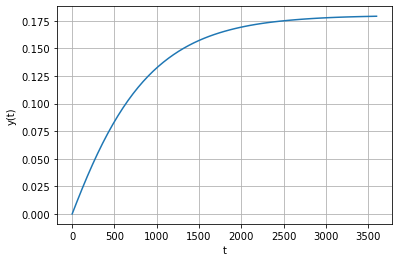

In [39]:
T = np.linspace(0, 60*60, 61)
U = np.zeros(T.shape, dtype=float)
U[T >= 0] = 0.5
x0 = [0]  # initial head
assert(U.shape == T.shape)
sim_out = input_output_response(sys, T, [U], x0, params=params)

plt.plot(sim_out.t, sim_out.y[0, :])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()

In [40]:
U

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])